# Pandas Time Series

In [84]:
from datetime import datetime

now = datetime.now()

now

datetime.datetime(2024, 12, 2, 10, 50, 54, 154670)

In [85]:
now.year, now.month, now.day

(2024, 12, 2)

In [86]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

delta

datetime.timedelta(days=926, seconds=56700)

In [87]:
delta.days

926

In [88]:
delta.seconds

56700

In [89]:
from datetime import timedelta

start = datetime(2011, 1, 7)

start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [90]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [92]:
stamp = datetime(2024, 12, 2)

str(stamp)

'2024-12-02 00:00:00'

In [93]:
stamp.strftime('%y-%m-%d')

'24-12-02'

In [94]:
value = '2024-12-02'

datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2024, 12, 2, 0, 0)

In [95]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [96]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [97]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [98]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [99]:
import pandas as pd

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [100]:
idx = pd.to_datetime(datestrs + [None])

idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [101]:
idx[2]

NaT

In [102]:
pd.isnull(idx)

array([False, False,  True])

In [104]:
from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)

ts 

2011-01-02    1.522204
2011-01-05   -0.378538
2011-01-07    0.912418
2011-01-08   -0.370085
2011-01-10    0.481582
2011-01-12   -0.504754
dtype: float64

In [105]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [109]:
ts + ts[::2]

2011-01-02    3.044408
2011-01-10         NaN
dtype: float64

In [110]:
ts.index.dtype

dtype('<M8[ns]')

In [111]:
stamp

datetime.datetime(2024, 12, 2, 0, 0)

In [117]:
stamp = ts.index[1]

ts[stamp]

0.4815824306417629

In [115]:
ts['1/10/2011']

0.4815824306417629

In [118]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

longer_ts

2000-01-01    0.509606
2000-01-02   -1.121812
2000-01-03    1.505734
2000-01-04   -1.063492
2000-01-05   -0.800513
                ...   
2002-09-22   -2.324101
2002-09-23   -0.772358
2002-09-24    1.604672
2002-09-25    0.532388
2002-09-26    0.167949
Freq: D, Length: 1000, dtype: float64

In [119]:
longer_ts['2001']

2001-01-01    0.660625
2001-01-02    0.537119
2001-01-03   -0.209868
2001-01-04   -0.148772
2001-01-05   -0.226488
                ...   
2001-12-27    0.385090
2001-12-28    0.048007
2001-12-29    0.543824
2001-12-30   -1.251928
2001-12-31    1.262942
Freq: D, Length: 365, dtype: float64

In [122]:
longer_ts['2001-05']

2001-05-01   -0.811866
2001-05-02    0.957025
2001-05-03   -0.919347
2001-05-04    0.191204
2001-05-05   -0.882051
2001-05-06   -0.028784
2001-05-07   -1.102791
2001-05-08   -1.204151
2001-05-09   -0.406551
2001-05-10    2.152007
2001-05-11    0.063066
2001-05-12    0.886148
2001-05-13   -0.226695
2001-05-14   -0.120363
2001-05-15   -0.866161
2001-05-16    0.325792
2001-05-17   -1.671265
2001-05-18    1.254674
2001-05-19    1.097664
2001-05-20   -0.683790
2001-05-21   -0.598626
2001-05-22    1.131874
2001-05-23   -0.636938
2001-05-24   -0.337034
2001-05-25   -0.365451
2001-05-26   -0.969088
2001-05-27   -0.571253
2001-05-28   -1.233105
2001-05-29   -0.766191
2001-05-30   -0.203288
2001-05-31   -0.610534
Freq: D, dtype: float64

In [123]:
ts[datetime(2011, 1, 7):]

2011-01-10    0.481582
dtype: float64

In [124]:
ts

2011-01-02    1.522204
2011-01-10    0.481582
dtype: float64

In [125]:
ts['1/6/2011':'1/11/2011']

2011-01-10    0.481582
dtype: float64

In [126]:
ts.truncate(after='1/9/2011')

2011-01-02    1.522204
dtype: float64

In [128]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New Yokr', 'Ohio'])

long_df.loc['5-2001']

,Colorado,Texas,New Yokr,Ohio
2001-05-02,-0.286560,-0.108142,0.948516,1.946651
2001-05-09,0.188465,0.460024,0.053035,-0.685751
2001-05-16,0.290140,-1.187414,-0.610673,-0.206320
2001-05-23,0.677668,-0.689838,-0.613056,1.037717
2001-05-30,1.840319,0.211387,0.921404,-0.775980


In [129]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

dup_ts = pd.Series(np.arange(5), index=dates)

dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [130]:
dup_ts.index.is_unique

False

In [131]:
dup_ts['1/3/2000']

4

In [132]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [133]:
grouped = dup_ts.groupby(level=0)

grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [134]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [135]:
ts

2011-01-02    1.522204
2011-01-10    0.481582
dtype: float64

In [136]:
index = pd.date_range('2012-04-01', '2012-06-01')

index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [137]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [138]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [139]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/2615318183.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range('2000-01-01', '2000-12-01', freq='BM')


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

In [140]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [141]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [143]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()

hour

<Hour>

In [145]:
four_hours = Hour(4)

four_hours

<4 * Hours>

In [147]:
pd.date_range('2000-01-01', '2000-01-03', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [148]:
Hour(2) + Minute(30)

<150 * Minutes>

In [149]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

In [150]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

list(rng)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

In [151]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

ts

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/283545619.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range('1/1/2000', periods=4, freq='M'))


2000-01-31    0.437156
2000-02-29   -1.256542
2000-03-31    2.067587
2000-04-30    1.205201
Freq: ME, dtype: float64

In [152]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.437156
2000-04-30   -1.256542
Freq: ME, dtype: float64

In [153]:
ts.shift(-2)

2000-01-31    2.067587
2000-02-29    1.205201
2000-03-31         NaN
2000-04-30         NaN
Freq: ME, dtype: float64

In [154]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -3.874356
2000-03-31   -2.645457
2000-04-30   -0.417098
Freq: ME, dtype: float64

In [155]:
ts.shift(2, freq='M')

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/1044886577.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.shift(2, freq='M')


2000-03-31    0.437156
2000-04-30   -1.256542
2000-05-31    2.067587
2000-06-30    1.205201
Freq: ME, dtype: float64

In [156]:
ts.shift(3, freq='D')

2000-02-03    0.437156
2000-03-03   -1.256542
2000-04-03    2.067587
2000-05-03    1.205201
dtype: float64

In [157]:
ts.shift(1, freq='90T')

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/987384525.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.shift(1, freq='90T')


2000-01-31 01:30:00    0.437156
2000-02-29 01:30:00   -1.256542
2000-03-31 01:30:00    2.067587
2000-04-30 01:30:00    1.205201
dtype: float64

In [159]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)

now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [160]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [161]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [163]:
offset = MonthEnd()

offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [164]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [165]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

ts

2000-01-15    1.488692
2000-01-19   -0.238471
2000-01-23    0.435254
2000-01-27    0.173542
2000-01-31   -0.967634
2000-02-04    0.975570
2000-02-08   -1.268208
2000-02-12    0.641092
2000-02-16    1.073123
2000-02-20   -0.124452
2000-02-24    0.860123
2000-02-28   -0.940941
2000-03-03    0.877946
2000-03-07   -0.209804
2000-03-11    0.004646
2000-03-15   -0.849869
2000-03-19   -0.388426
2000-03-23    1.033131
2000-03-27    0.676180
2000-03-31   -1.643624
Freq: 4D, dtype: float64

In [166]:
ts.resample('M').mean()

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/2305925915.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample('M').mean()


2000-01-31    0.178277
2000-02-29    0.173758
2000-03-31   -0.062478
Freq: ME, dtype: float64

In [167]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [169]:
tz = pytz.timezone('America/New_York')

tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [170]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-03-09 09:30:00    0.029349
2012-03-10 09:30:00    0.196792
2012-03-11 09:30:00   -2.127329
2012-03-12 09:30:00    1.195825
2012-03-13 09:30:00    1.059009
2012-03-14 09:30:00   -2.377578
Freq: D, dtype: float64

In [171]:
print(ts.index.tz)

None


In [172]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [173]:
ts

2012-03-09 09:30:00    0.029349
2012-03-10 09:30:00    0.196792
2012-03-11 09:30:00   -2.127329
2012-03-12 09:30:00    1.195825
2012-03-13 09:30:00    1.059009
2012-03-14 09:30:00   -2.377578
Freq: D, dtype: float64

In [174]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-09 09:30:00+00:00    0.029349
2012-03-10 09:30:00+00:00    0.196792
2012-03-11 09:30:00+00:00   -2.127329
2012-03-12 09:30:00+00:00    1.195825
2012-03-13 09:30:00+00:00    1.059009
2012-03-14 09:30:00+00:00   -2.377578
Freq: D, dtype: float64

In [175]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [178]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.029349
2012-03-10 04:30:00-05:00    0.196792
2012-03-11 05:30:00-04:00   -2.127329
2012-03-12 05:30:00-04:00    1.195825
2012-03-13 05:30:00-04:00    1.059009
2012-03-14 05:30:00-04:00   -2.377578
Freq: D, dtype: float64

In [181]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [182]:
stamp = pd.Timestamp('2011-03-12 04:00')

stamp_utc = stamp.tz_localize('utc')

stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [183]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [184]:
stamp_utc.value

1299902400000000000

In [186]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [187]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [188]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [189]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [190]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [191]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-03-07 09:30:00   -0.329708
2012-03-08 09:30:00   -0.210185
2012-03-09 09:30:00    0.409782
2012-03-12 09:30:00   -0.263239
2012-03-13 09:30:00    0.654519
2012-03-14 09:30:00    0.902828
2012-03-15 09:30:00    0.136942
2012-03-16 09:30:00    2.026167
2012-03-19 09:30:00   -0.243537
2012-03-20 09:30:00   -0.476980
Freq: B, dtype: float64

In [192]:
ts1 = ts[:7].tz_localize('Europe/London')

ts2 = ts1[2:].tz_convert('Europe/Moscow')

result = ts1 + ts1

result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq=None)

In [197]:
p = pd.Period(2007, freq='A-DEC')

p

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/2527976660.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period(2007, freq='A-DEC')


Period('2007', 'Y-DEC')

In [198]:
p + 5

Period('2012', 'Y-DEC')

In [199]:
p - 2

Period('2005', 'Y-DEC')

In [201]:
pd.Period('2014', freq='A-DEC') - p

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/1089596655.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  pd.Period('2014', freq='A-DEC') - p


<7 * YearEnds: month=12>

In [202]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [203]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.538271
2000-02   -0.067900
2000-03    1.757340
2000-04   -0.353400
2000-05   -0.658946
2000-06    1.123446
Freq: M, dtype: float64

In [204]:
values = ['2001Q3', '2002Q2', '2003Q1']

index = pd.PeriodIndex(values, freq='Q-DEC')

index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [206]:
p = pd.Period('2007', freq='A-DEC')

p

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/548208447.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period('2007', freq='A-DEC')


Period('2007', 'Y-DEC')

In [207]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [208]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [209]:
p = pd.Period('2007', freq='A-JUN')

p

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/260214846.py:1: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p = pd.Period('2007', freq='A-JUN')


Period('2007', 'Y-JUN')

In [211]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [212]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [213]:
p = pd.Period('Aug-2007', 'M')

p.asfreq('A-JUN')

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/325677694.py:3: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p.asfreq('A-JUN')


Period('2008', 'Y-JUN')

In [214]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/3049511508.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  rng = pd.period_range('2006', '2009', freq='A-DEC')


2006   -0.070644
2007   -0.372239
2008    0.184729
2009    0.690270
Freq: Y-DEC, dtype: float64

In [215]:
ts.asfreq('M', how='start')

2006-01   -0.070644
2007-01   -0.372239
2008-01    0.184729
2009-01    0.690270
Freq: M, dtype: float64

In [216]:
ts.asfreq('B', how='end')

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/3401117408.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq('B', how='end')


2006-12-29   -0.070644
2007-12-31   -0.372239
2008-12-31    0.184729
2009-12-31    0.690270
Freq: B, dtype: float64

In [217]:
p = pd.Period('2013Q4', freq='Q-JAN')

p

Period('2013Q4', 'Q-JAN')

In [218]:
p.asfreq('D', 'start')

Period('2012-11-01', 'D')

In [220]:
p.asfreq('D', 'end')

Period('2013-01-31', 'D')

In [221]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

p4pm

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/3846987713.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/3846987713.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60


Period('2013-01-30 16:00', 'min')

In [222]:
p4pm.to_timestamp()

Timestamp('2013-01-30 16:00:00')

In [223]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

ts = pd.Series(np.arange(len(rng)), index=rng)

ts 

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [230]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('min', 's') + 16 * 60

ts.index = new_rng.to_timestamp()

ts

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/2778277706.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_rng = (rng.asfreq('B') - 1).asfreq('min', 's') + 16 * 60


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [231]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

ts = pd.Series(np.random.randn(3), index=rng)

ts

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/3298706609.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng = pd.date_range('2000-01-01', periods=3, freq='M')


2000-01-31   -1.726275
2000-02-29   -1.829529
2000-03-31   -1.620164
Freq: ME, dtype: float64

In [232]:
pts = ts.to_period

pts 

<bound method Series.to_period of 2000-01-31   -1.726275
2000-02-29   -1.829529
2000-03-31   -1.620164
Freq: ME, dtype: float64>

In [234]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

ts2 = pd.Series(np.random.randn(6), index=rng)

ts2

2000-01-29   -0.195265
2000-01-30   -0.374976
2000-01-31    0.339708
2000-02-01    1.540993
2000-02-02   -0.125563
2000-02-03    1.044526
Freq: D, dtype: float64

In [235]:
ts2.to_period('M')

2000-01   -0.195265
2000-01   -0.374976
2000-01    0.339708
2000-02    1.540993
2000-02   -0.125563
2000-02    1.044526
Freq: M, dtype: float64

In [236]:
pts = ts2.to_period()

pts

2000-01-29   -0.195265
2000-01-30   -0.374976
2000-01-31    0.339708
2000-02-01    1.540993
2000-02-02   -0.125563
2000-02-03    1.044526
Freq: D, dtype: float64

In [237]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.195265
2000-01-30 23:59:59.999999999   -0.374976
2000-01-31 23:59:59.999999999    0.339708
2000-02-01 23:59:59.999999999    1.540993
2000-02-02 23:59:59.999999999   -0.125563
2000-02-03 23:59:59.999999999    1.044526
Freq: D, dtype: float64

In [238]:
data = pd.read_csv('macrodata.csv')

data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [239]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [240]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [241]:
data.realgdp

0       2710.349
1       2778.801
2       2775.488
3       2785.204
4       2847.699
         ...    
198    13324.600
199    13141.920
200    12925.410
201    12901.504
202    12990.341
Name: realgdp, Length: 203, dtype: float64

In [243]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')

index

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/1969226061.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  index = pd.PeriodIndex(year=data.year, quarter=data.quarter,


PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [245]:
data.index = index

data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [246]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2000-01-01   -0.490725
2000-01-02    1.043513
2000-01-03   -0.547405
2000-01-04    0.919840
2000-01-05    0.423251
                ...   
2000-04-05   -0.010009
2000-04-06    1.535866
2000-04-07   -1.188194
2000-04-08    1.579831
2000-04-09    3.263959
Freq: D, Length: 100, dtype: float64

In [247]:
ts.resample('M').mean()

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/2305925915.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample('M').mean()


2000-01-31    0.203590
2000-02-29   -0.281759
2000-03-31   -0.000536
2000-04-30    0.734326
Freq: ME, dtype: float64

In [248]:
ts.resample('M', kind='period').mean()

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/1597458493.py:1: FutureWarning: The 'kind' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  ts.resample('M', kind='period').mean()
/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/1597458493.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample('M', kind='period').mean()


2000-01    0.203590
2000-02   -0.281759
2000-03   -0.000536
2000-04    0.734326
Freq: M, dtype: float64

In [249]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

ts = pd.Series(np.arange(12), index=rng)

ts 

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/515051553.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  rng = pd.date_range('2000-01-01', periods=12, freq='T')


2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int64

In [252]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5min, dtype: int64

In [254]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [255]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York',
                              'Ohio'])

frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.726304,-0.150405,-1.325901,0.920060
2000-01-12,-0.639092,-0.006042,1.263499,-1.303051


In [256]:
df_daily = frame.resample('D').asfreq()

df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.726304,-0.150405,-1.325901,0.920060
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.639092,-0.006042,1.263499,-1.303051


In [257]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.726304,-0.150405,-1.325901,0.920060
2000-01-06,-0.726304,-0.150405,-1.325901,0.920060
2000-01-07,-0.726304,-0.150405,-1.325901,0.920060
2000-01-08,-0.726304,-0.150405,-1.325901,0.920060
2000-01-09,-0.726304,-0.150405,-1.325901,0.920060
2000-01-10,-0.726304,-0.150405,-1.325901,0.920060
2000-01-11,-0.726304,-0.150405,-1.325901,0.920060
2000-01-12,-0.639092,-0.006042,1.263499,-1.303051


In [258]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.726304,-0.150405,-1.325901,0.920060
2000-01-06,-0.726304,-0.150405,-1.325901,0.920060
2000-01-07,-0.726304,-0.150405,-1.325901,0.920060
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.639092,-0.006042,1.263499,-1.303051


In [259]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.726304,-0.150405,-1.325901,0.920060
2000-01-13,-0.639092,-0.006042,1.263499,-1.303051


In [260]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York',
                              'Ohio'])

frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.452358,0.847293,0.140489,0.067340
2000-02,1.154298,0.352019,0.993916,2.366614
2000-03,-0.336340,-1.378856,0.372073,0.202792
2000-04,0.857999,-1.879983,0.100906,-1.289433
2000-05,-0.179651,-0.257718,-0.734229,0.971533


In [261]:
frame

,Colorado,Texas,New York,Ohio
2000-01,-1.452358,0.847293,0.140489,0.067340
2000-02,1.154298,0.352019,0.993916,2.366614
2000-03,-0.336340,-1.378856,0.372073,0.202792
2000-04,0.857999,-1.879983,0.100906,-1.289433
2000-05,-0.179651,-0.257718,-0.734229,0.971533
2000-06,1.965013,1.243160,0.642915,-0.117205
2000-07,0.826353,-0.597159,2.040255,-1.404847
2000-08,2.002614,-0.556138,-0.408447,-1.786744
2000-09,-0.078344,0.179807,-0.677101,-0.041692
2000-10,-0.826422,0.291996,-1.352455,-0.115081


In [262]:
annual_frame = frame.resample('A-DEC').mean()

annual_frame

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/664770557.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  annual_frame = frame.resample('A-DEC').mean()
/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/664770557.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame = frame.resample('A-DEC').mean()


,Colorado,Texas,New York,Ohio
2000,0.237564,0.022832,-0.066856,-0.216556
2001,0.029075,-0.194239,0.503850,-0.357988


In [263]:
annual_frame.resample('Q-DEC').ffill()

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/2878672077.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-DEC').ffill()


,Colorado,Texas,New York,Ohio
2000Q1,0.237564,0.022832,-0.066856,-0.216556
2000Q2,0.237564,0.022832,-0.066856,-0.216556
2000Q3,0.237564,0.022832,-0.066856,-0.216556
2000Q4,0.237564,0.022832,-0.066856,-0.216556
2001Q1,0.029075,-0.194239,0.503850,-0.357988
2001Q2,0.029075,-0.194239,0.503850,-0.357988
2001Q3,0.029075,-0.194239,0.503850,-0.357988
2001Q4,0.029075,-0.194239,0.503850,-0.357988


In [264]:
annual_frame.resample('Q-DEC', convention='end').ffill()

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/389194020.py:1: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-DEC', convention='end').ffill()
/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/389194020.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-DEC', convention='end').ffill()


,Colorado,Texas,New York,Ohio
2000Q4,0.237564,0.022832,-0.066856,-0.216556
2001Q1,0.237564,0.022832,-0.066856,-0.216556
2001Q2,0.237564,0.022832,-0.066856,-0.216556
2001Q3,0.237564,0.022832,-0.066856,-0.216556
2001Q4,0.029075,-0.194239,0.503850,-0.357988


In [265]:
annual_frame.resample('Q-MAR').ffill()

/var/folders/n6/_1rxv4ns7672lxq4v_lfp9mc0000gn/T/ipykernel_45899/3348307439.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-MAR').ffill()


,Colorado,Texas,New York,Ohio
2000Q4,0.237564,0.022832,-0.066856,-0.216556
2001Q1,0.237564,0.022832,-0.066856,-0.216556
2001Q2,0.237564,0.022832,-0.066856,-0.216556
2001Q3,0.237564,0.022832,-0.066856,-0.216556
2001Q4,0.029075,-0.194239,0.503850,-0.357988
2002Q1,0.029075,-0.194239,0.503850,-0.357988
2002Q2,0.029075,-0.194239,0.503850,-0.357988
2002Q3,0.029075,-0.194239,0.503850,-0.357988


<Axes: >

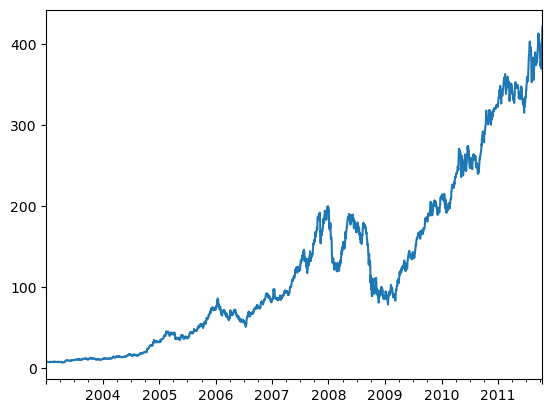

In [266]:
close_px_all = pd.read_csv('stock_px_2.csv', parse_dates=True, index_col=0)

close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

close_px = close_px.resample('B').ffill()

close_px.AAPL.plot()

<Axes: >

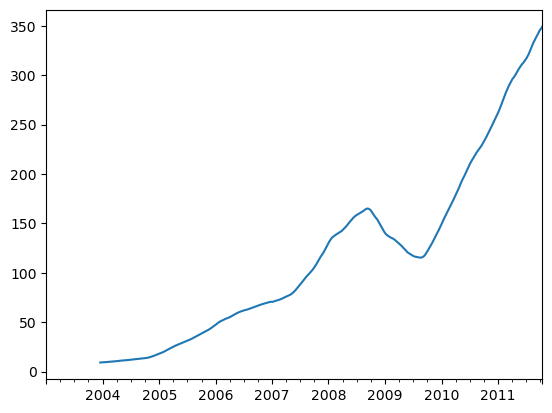

In [267]:
close_px.AAPL.rolling(250).mean().plot()

In [268]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<Axes: >

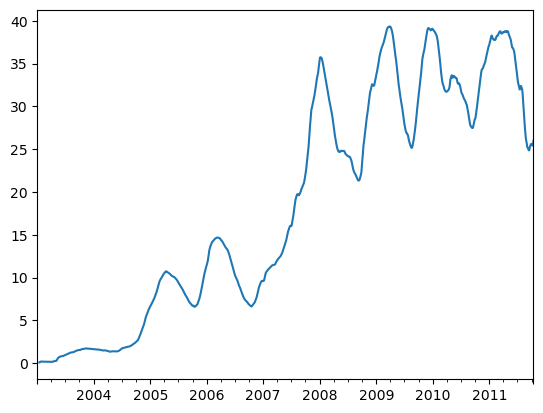

In [269]:
appl_std250.plot()

<Axes: >

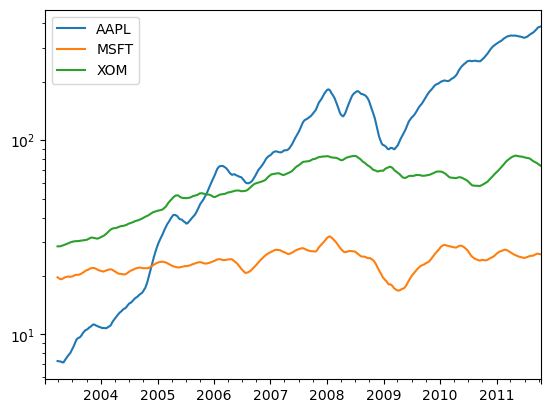

In [270]:
expanding_mean = appl_std250.expanding().mean()

close_px.rolling(60).mean().plot(logy=True)

In [271]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


<Axes: >

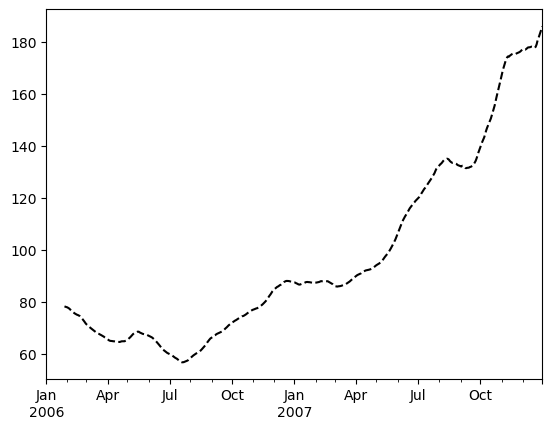

In [273]:
aapl_px = close_px.AAPL['2006': '2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()

ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')

<Axes: >

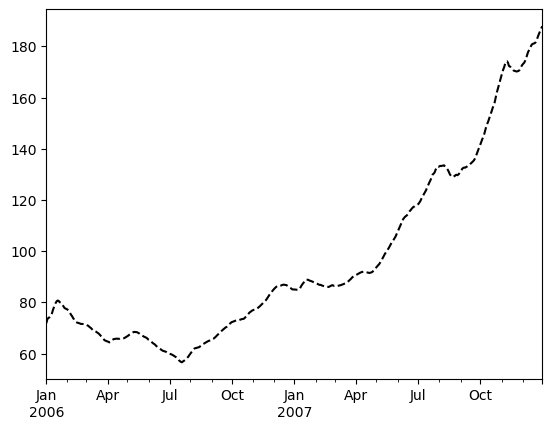

In [277]:
ewma60.plot(style='k--', label='EW MA')

<Axes: >

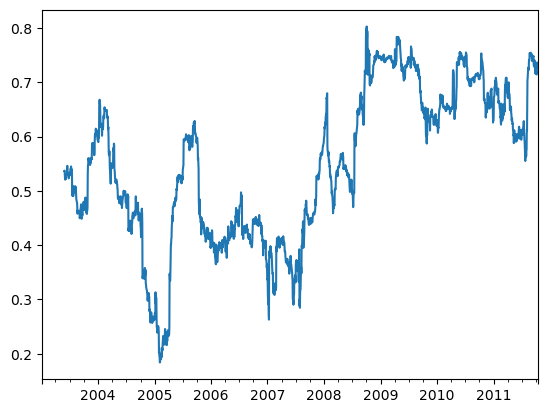

In [279]:
spx_px = close_px_all['SPX']

spx_rets = spx_px.pct_change()

returns = close_px.pct_change()

corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<Axes: >

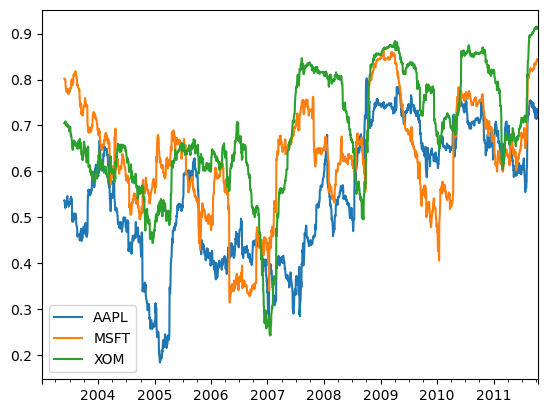

In [280]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<Axes: >

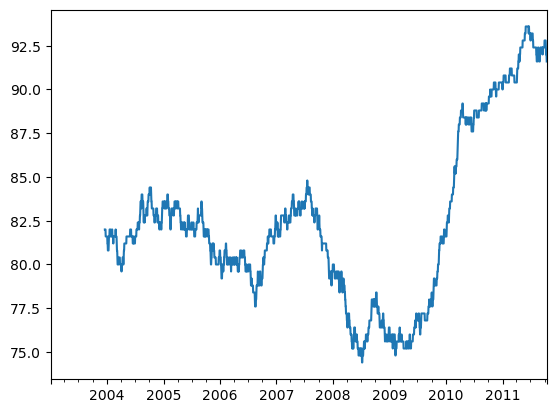

In [281]:
from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x, 0.02)

result = returns.AAPL.rolling(250).apply(score_at_2percent)

result.plot()